In [1]:
import numpy as np
from M1S_tools import *
import matplotlib.pyplot as plt

%matplotlib inline
plt.jet()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
## bending modes & influence matrices etc from Buddy #####################
ML actuators =  165 165
Afn =  (6991, 165)
fv =  (165, 165)
U matrix (6991, 165)
N node =  6991
## bending modes & influence matrices etc from Trupti #####################
N actuators =  170
Afz =  (27685, 170)
Afx =  (27685, 170)
Afy =  (27685, 170)
U matrix (27685, 170)
V matrix (170, 170)
S matrix (170, 170)
N node =  27685


<Figure size 640x480 with 0 Axes>

In [15]:
#n_of_BMs = 27
n_of_BMs = 46

## choose one out of the three below

In [48]:
#for testing decomposition:
radial_shift_zn = np.zeros(4)
radial_shift_zn[4-1] = 1.75/2

In [31]:
#radial shift
radial_shift_zn = np.zeros(8)
radial_shift_zn[4-1] = 0.799
radial_shift_zn[6-1] = -0.539 #x astig only, z5 is 45 deg ast, ref rb2Zn.ipynb
radial_shift_zn[7-1] = 0.049 #y coma only, z8 is x coma, ref rb2Zn.ipynb

In [37]:
#clocking
radial_shift_zn = np.zeros(8)
radial_shift_zn[5-1] = 1.28 #z5 only, ref rb2Zn.ipynb
radial_shift_zn[8-1] = 0.168 #z8 only, ref rb2Zn.ipynb

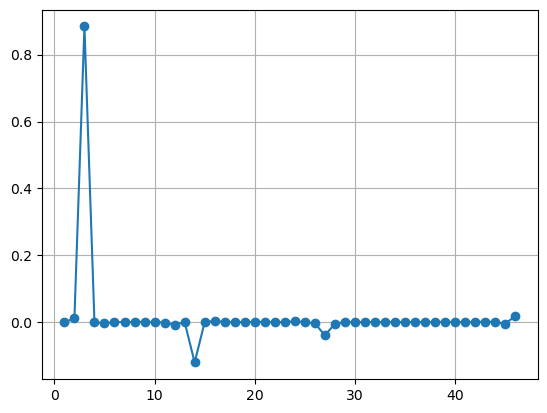

In [49]:
z_measure = ZernikeEval(radial_shift_zn, nodex_ml/radius_of_CA, nodey_ml/radius_of_CA)

bm_coeff = UMat_ml.transpose() /UMat_ml.shape[0] @ z_measure
plt.plot(np.arange(1,n_of_BMs+1), bm_coeff[:n_of_BMs], '-o')
plt.grid()

In [50]:
z_fit = UMat_ml[:,:n_of_BMs] @ bm_coeff[:n_of_BMs]

In [51]:
force_ml = VMat_ml[:,:n_of_BMs] @ bm_coeff[:n_of_BMs]

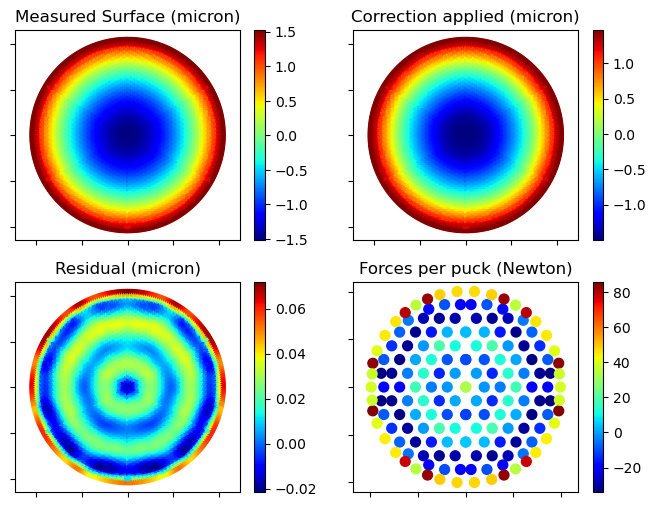

In [52]:
fig, ax = plt.subplots(2,2, figsize=(8,6))

img = ax[0][0].scatter(nodex_ml, nodey_ml, 10, c=z_measure)
fig.colorbar(img, ax=ax[0][0])
ax[0][0].xaxis.set_ticklabels([])
ax[0][0].yaxis.set_ticklabels([])
ax[0][0].set_title('Measured Surface (micron)')
ax[0][0].axis('equal');

img = ax[0][1].scatter(nodex_ml, nodey_ml, 10, c=z_fit)
fig.colorbar(img, ax=ax[0][1])
ax[0][1].xaxis.set_ticklabels([])
ax[0][1].yaxis.set_ticklabels([])
ax[0][1].set_title('Correction applied (micron)')
ax[0][1].axis('equal');

img = ax[1][0].scatter(nodex_ml, nodey_ml, 10, c=z_measure-z_fit)
fig.colorbar(img, ax=ax[1][0])
ax[1][0].xaxis.set_ticklabels([])
ax[1][0].yaxis.set_ticklabels([])
ax[1][0].set_title('Residual (micron)')
ax[1][0].axis('equal');

img = ax[1][1].scatter(sax, say, 50, c=mlFvec2gmtFvec(force_ml)/npuck)
fig.colorbar(img, ax=ax[1][1])
ax[1][1].xaxis.set_ticklabels([])
ax[1][1].yaxis.set_ticklabels([])
ax[1][1].set_title('Forces per puck (Newton)')
ax[1][1].axis('equal');

In [47]:
np.std(mlFvec2gmtFvec(force_ml)/npuck)

64.53965625149524